# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

###  Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [11]:
!pip -q install ./python


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [12]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [13]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

## Train the Agent

Run the next code cell to train the DDPG Agent

In [14]:
from multi_agent import MultiAgent

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
env_info = env.reset(train_mode=True)[brain_name]

In [16]:
# hyperparameters
NUM_AGENTS = len(env_info.agents) # number of agents
BUFFER_SIZE = int(1e6)            # replay buffer size
BATCH_SIZE = 512                  # minibatch size
GAMMA = 0.99                      # discount factor
TAU = 1e-3                        # for soft update of target parameters
LR_ACTOR = 1e-4                   # learning rate of the actor 
LR_CRITIC = 3e-4                  # learning rate of the critic
WEIGHT_DECAY = 0                  # L2 weight decay
UPDATE_EVERY = 4                  # timesteps beteween learning

ACTOR_LAYERS = [512, 256]
CRITIC_LAYERS = [512, 256]

In [17]:
multiagent = MultiAgent(env, BUFFER_SIZE,
              BATCH_SIZE, GAMMA, TAU, LR_ACTOR, LR_CRITIC, WEIGHT_DECAY,
              ACTOR_LAYERS, CRITIC_LAYERS, NUM_AGENTS, UPDATE_EVERY)

In [18]:
scores = multiagent.train(1000, 2000)

Episode: 	13 	Score: 	2.35 	Mean Scores: 	0.594
Environment solved in 13 episodes!	Mean Scores: 0.59


In [19]:
env.close()

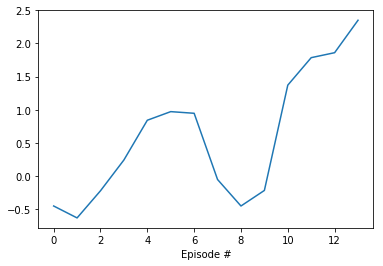

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

scores_df = pd.DataFrame(scores, columns=['scores'])
fig = plt.figure()
ax = fig.add_subplot(111)
scores_df.scores.plot()
plt.xlabel('Episode #')
plt.show()